In [1]:
import numpy as np
import pandas as pd

In [5]:
import pandas as pd
encodings=['utf-8','latin1','ISO-8859-1','cp1252']
file_path='/content/spam.csv'
for encoding in encodings:
  try:
    df=pd.read_csv(file_path,encoding=encoding)
    print("File sucessfully read")
    break
  except UnicodeDecodeError:
    print("Failed")
    continue

if 'df' in locals():
  print('Csv is loaded')
else:
  print('Loading failed')

Failed
File sucessfully read
Csv is loaded


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4896,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
1918,ham,Is fujitsu s series lifebook good?,NaN,NaN,NaN
4095,ham,"Hey , is * rite u put åÈ10 evey mnth is that all?",NaN,NaN,NaN
5467,spam,Get your garden ready for summer with a FREE s...,NaN,NaN,NaN
4265,ham,The greatest test of courage on earth is to be...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [15]:
df.sample(5)

,v1,v2
1072,spam,Dear U've been invited to XCHAT. This is our f...
288,ham,"My life Means a lot to me, Not because I love ..."
3076,ham,There is no sense in my foot and penis.
3686,ham,Great! I shoot big loads so get ready!
1251,spam,Please CALL 08712402779 immediately as there i...


In [17]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2307,spam,WIN a year supply of CDs 4 a store of ur choic...
5076,ham,"Guy, no flash me now. If you go call me, call ..."
4106,spam,HOT LIVE FANTASIES call now 08707500020 Just 2...
2415,ham,Huh means computational science... Y they like...
4169,ham,"Mmmmmm ... I love you,so much, Ahmad ... I can..."


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [19]:
df['target']=encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
df.duplicated().sum()

403

In [23]:
df=df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

In [26]:
df.shape

(5169, 2)

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x79f81f1e40d0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

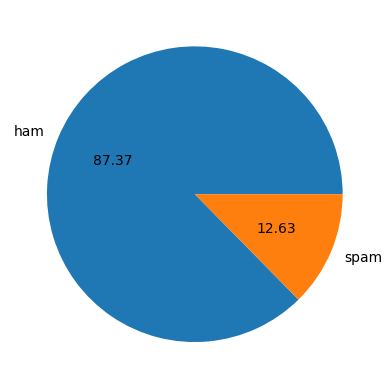

In [30]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [31]:
import nltk

In [32]:
!pip install nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
df['num_characters']=df['text'].apply(len)

In [36]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [42]:
df['num_words']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [44]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,1.965564
std,58.236293,1.448541,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,1.000000
50%,60.000000,1.000000,1.000000
75%,117.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [45]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,1.820195
std,56.358207,1.383657,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,1.000000
50%,52.000000,1.000000,1.000000
75%,90.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [46]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,2.970904
std,30.137753,1.488425,1.488425
min,13.000000,1.000000,1.000000
25%,132.000000,2.000000,2.000000
50%,149.000000,3.000000,3.000000
75%,157.000000,4.000000,4.000000
max,224.000000,9.000000,9.000000


In [47]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

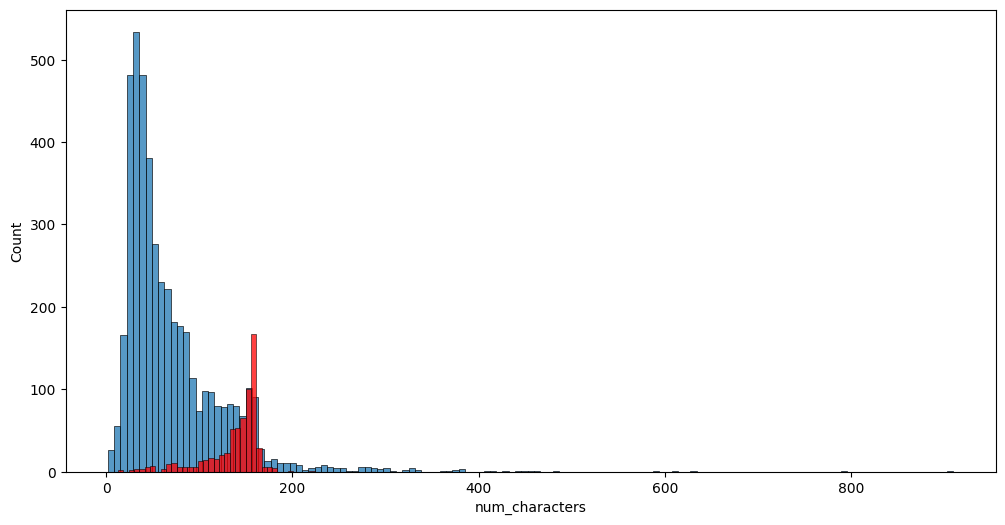

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

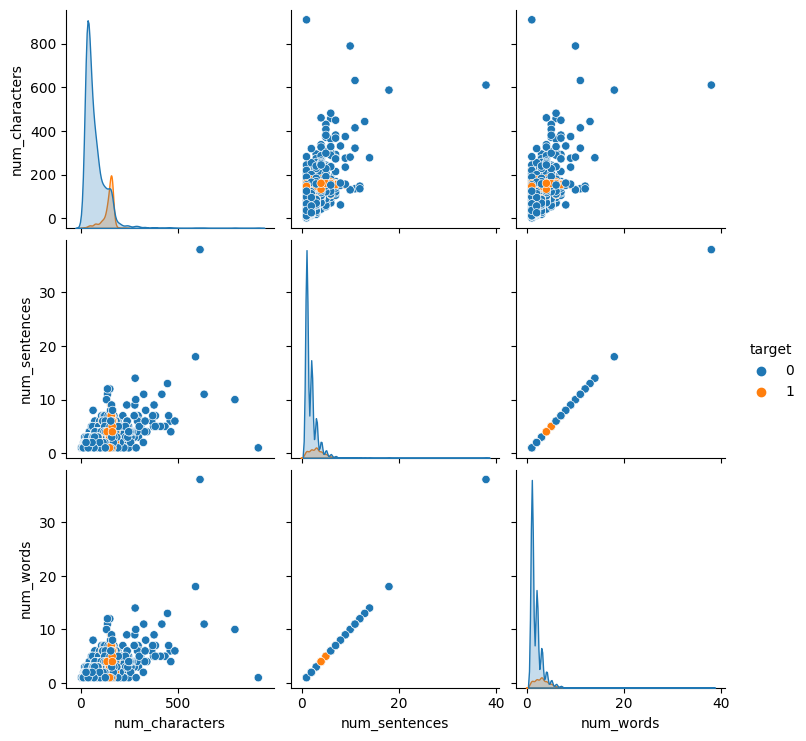

In [52]:
sns.pairplot(df,hue='target')

<ipython-input-53-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

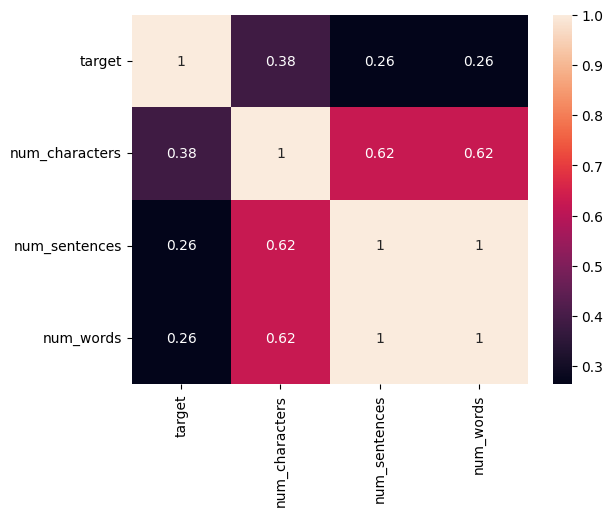

In [53]:
sns.heatmap(df.corr(),annot=True)

In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()

def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

transformed_text=transform_text("I am going to France")
print(transformed_text)


go franc


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [65]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('walking')

'walk'

In [66]:
df['transformed_text']=df['text'].apply(transform_text)

In [67]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [68]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [78]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

In [81]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

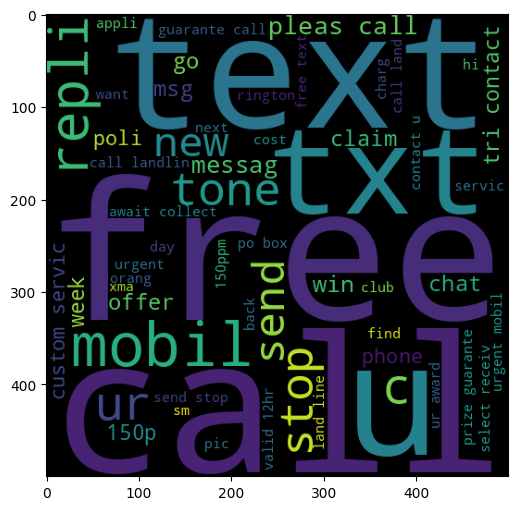

In [82]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [83]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [84]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [85]:
len(spam_corpus)

9939

In [98]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [100]:
len(ham_corpus)

35404

In [101]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [105]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer(max_features=3000)

In [106]:
x=Tfidf.fit_transform(df['transformed_text']).toarray()

In [122]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
x.shape

(5169, 3000)

In [108]:
y=df['target'].values

In [109]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [111]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [112]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [118]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [120]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [121]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [123]:
!pip install xgboost

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [126]:
from random import Random
svc=SVC(kernel='sigmoid',gamma=0.1)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)



In [127]:
from re import A
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [132]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [133]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9294003868471954, 0.9710144927536232)

In [136]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9294003868471954
Precision -  0.9710144927536232
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [137]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [138]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
8,ETC,0.974855,0.974576
0,SVC,0.929400,0.971014
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [139]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [140]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,ETC,Accuracy,0.974855
4,SVC,Accuracy,0.929400
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


In [142]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [145]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [146]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [147]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores})

In [149]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,SVC,0.929400,0.971014,0.929400,0.971014,0.929400,0.971014,0.929400,0.971014
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [155]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [156]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('etc',etc)],voting='soft')

In [157]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [159]:
y_pred=voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [160]:
estimators=[('svm',svc),('nb',mnb),('etc',etc)]
final_estimators=RandomForestClassifier()

In [161]:
from sklearn.ensemble import StackingClassifier

In [169]:
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimators)

In [170]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [177]:
import pickle
global tfidf
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [183]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

x_train=["sample text 1","sample text 2","sample text 3"]
y_train=[0,1,0]

tfidf=TfidfVectorizer(lowercase=True,stop_words='english')
x_train_tfidf=tfidf.fit(x_train).transform(x_train)
mnb=MultinomialNB()
mnb.fit(x_train_tfidf,y_train)

with open('vectorizer.pkl','wb') as vectorizer_file:
  pickle.dump(tfidf,vectorizer_file)

with open('model.pkl','wb') as model_file:
  pickle.dump(mnb,model_file)